In [1]:
# Imports
import torch
import os 
import sys
from dask_jobqueue import SLURMCluster
from distributed import Client
from pathlib import Path



import do_abelation_bayesimp

In [16]:
# Args setup
ntrial = 50
n = 100
ntest = 1000
d = 5
noise = 1.0
optimise_mu = [False,True, False, True]
exact = [False, False, True, True]
mc_samples = 100

In [17]:
# Cluster creation
cluster = SLURMCluster(
    n_workers=0,
    memory="32GB",
    processes=1,
    cores=1,
    scheduler_options={
        "dashboard_address": ":11111",
        "allowed_failures": 10
    },
    job_cpu=1,
    walltime="6:0:0",
    #job_extra_directives = ["-p medium,cpu"],
)
cluster.adapt(minimum=0, maximum=200)
client = Client(cluster)

In [18]:
# Submitting jobs
futures = []
for i in range(len(optimise_mu)):           
    for seed in range(ntrial):
            f = client.submit(do_abelation_bayesimp.main,seed,n,ntest,d,noise,
                             optimise_mu = optimise_mu[i], exact = exact[i],
                             mc_samples = mc_samples)
            futures += [f]

In [19]:
# Check on futures
futures

[<Future: pending, key: main-4793ba33ad0e69979a5a59e1e99abe32>,
 <Future: pending, key: main-2ec3f89945256919a0030dc187a4da01>,
 <Future: pending, key: main-80c12327af665c24258ad87ee4270c60>,
 <Future: pending, key: main-345d74e4ef91983c23adb11102c5b326>,
 <Future: pending, key: main-250c5d1750717e92b1dbc32f8fd16d03>,
 <Future: pending, key: main-926278aea8196cfefd8f701132a28320>,
 <Future: pending, key: main-7aeb1f8d528f90c97922cbeff1f5d7dd>,
 <Future: pending, key: main-ab12947867b8d2530349517f15d04205>,
 <Future: pending, key: main-242330ad1da1e6ed20b303bbb9818a9c>,
 <Future: pending, key: main-e335f1390f5cab545f7a4e571c38cda6>,
 <Future: pending, key: main-f847ba4c14793fb43f2eb7444639e983>,
 <Future: pending, key: main-775af5804f6746e79b52ab3bf4c76291>,
 <Future: pending, key: main-b0e3a3028a559ed0a65563c2f5dcdf0c>,
 <Future: pending, key: main-7e579b63c4f7b8471fb2ec3dcaec200d>,
 <Future: pending, key: main-875239c73d6804ec09f16631a724467a>,
 <Future: pending, key: main-0e2f7b05693

In [20]:
# Getting results
results = client.gather(futures)

In [21]:
# Closing client
client.close()
cluster.close()

In [22]:
# Saving results
torch.save(obj = results,
           f = "abelation_bayesimp_ntrial={0}_n={1}_d={2}_noise={3}.pt".format(ntrial,n,d,noise))

In [33]:
os.getcwd()

'/nfs/ghome/live/danceh/Causal-GP/causal-KL-GP/experiments/slurm/Abelation/bayesimp'

In [39]:
1-(1-0.0001)**50

0.004987769576990653

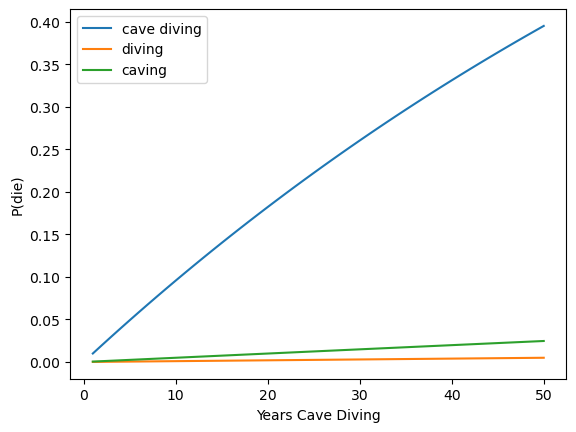

In [44]:
p = 0.01
def geo_cdf(p,x):
    return 1-(1-p)**x.int()
x = torch.linspace(1,50,50)
import matplotlib.pyplot as plt
plt.plot(x, geo_cdf(p,x), label = "cave diving")
plt.plot(x, geo_cdf(p*0.01,x), label = "diving")
plt.plot(x, geo_cdf(p*0.05,x), label = "caving")

plt.xlabel("Years Cave Diving")
plt.ylabel("P(die)")
plt.legend()
plt.savefig("cave_diving", bbox_inches = "tight")